In [6]:
# https://www.kaggle.com/vkrahul/twitter-hate-speech

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.externals import joblib

import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt

In [29]:
def read_data(path):
    df = pd.read_csv(path)
    df2 = df.reindex(np.random.permutation(df.index))
    X = df2.tweet
    y = df2.label
    return X, y

from sklearn.metrics import roc_curve
def drawROCSVM(test, pred):
    false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(test, pred)
    roc_curve = auc(false_positive_rate, true_positive_rate)
    print("Drawing")
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label= 'SVM AUC = %0.2f' % roc_curve, color = 'b')
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Possitive Rate')
    plt.xlabel('Flase Positive Rate')
    plt.show()


def save_model(model):
    joblib.dump(model, 'model.pkl')


def createSVM(text, label):
    SVM_classifier = Pipeline([('vect', CountVectorizer(max_df=0.7)), ('tfidf', TfidfTransformer()), ('SVM', SVC(kernel='linear', C=1))])
    SVM_classifier = SVM_classifier.fit(text, label)
    return SVM_classifier


def createNB(text, label):
    NB_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('NB', MultinomialNB())])
    NB_classifier = NB_classifier.fit(text, label)
    return NB_classifier


def evaluateModel(y_test, y_pred):
    print(metrics.confusion_matrix(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(accuracy)
    report = classification_report(y_test, y_pred)
    print(report)

In [15]:
X, y = read_data('train.csv')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
SVM_classifier = createSVM(X_train, y_train)
y_pred = SVM_classifier.predict(X_test)

SVM Eval
[[8838   36]
 [ 373  342]]
0.9573469600584003
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8874
           1       0.90      0.48      0.63       715

    accuracy                           0.96      9589
   macro avg       0.93      0.74      0.80      9589
weighted avg       0.96      0.96      0.95      9589

Drawing
ipykernel_launcher:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


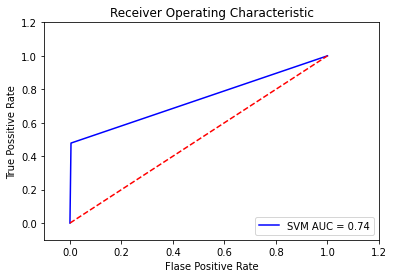

In [30]:
print("SVM Eval")
evaluateModel(y_test, y_pred)
drawROCSVM(y_test, y_pred)